## Comparison Sarsa and Q-Learning
### FrozenLake

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../agents')
sys.path.append('../environments')
sys.path.append('../tools')

import gym
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from utils import *
from MonteCarlo import MonteCarloEV, MonteCarloFV

%matplotlib inline

In [3]:
# initialize env
env = Experiment(gym.make('FrozenLake-v0'))

### Monte Carlo Every Visit

In [36]:
tries =3
episodes = 2000
results_MonteCarloEV = np.zeros((tries, episodes))
epsilon_decay = 1-(1/episodes)*2

for t in range(tries):
    agent = MonteCarloEV(env.env, discount_factor=0.9, 
                      exploration_rate=0.8,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      qtable_default=1
                     )
    # fit and save results
    env.fit(agent, episodes)
    results_MonteCarloEV[t, :] = agent.rewards_per_episode


### Monte Carlo First Visit

In [37]:
tries =3
episodes = 2000
results_MonteCarloFV = np.zeros((tries, episodes))
epsilon_decay = 1-(1/episodes)*2

for t in range(tries):
    agent = MonteCarloFV(env.env, discount_factor=0.9, 
                      exploration_rate=0.8,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      qtable_default=1
                     )
    # fit and save results
    env.fit(agent, episodes)
    results_MonteCarloFV[t, :] = agent.rewards_per_episode


### Comparison

(0, 0.2)

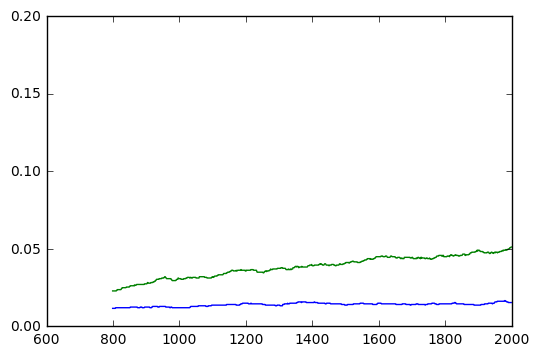

In [38]:
# 3x10000 episodes, qtable default = 0
plot_rewards(np.mean(results_MonteCarloEV, axis=0), smoothing=0.4, color='green')
plot_rewards(np.mean(results_MonteCarloFV, axis=0), smoothing=0.4, color='blue')
plt.ylim((0,0.2))

Adjusting the smoothing parameter, it is clear Monte Carlo Every Visit outperforms the First Visit up to 3000 episodes. Te result is similar even when the results are ran again, with action-value function initiated to 0 or to 1.

Every visit has more samples to update from than the first visit version, so it learns faster. This is clearly seen when compared to the Q-Learning algorithm that bootstraps though the value function to help estimate future returns, so is able to do policy improvement at every step.